### Using the food hub data, find the low outliers and high outliers for each of the quantitative columns

#### SETUP

In [129]:
import pandas as pd
import numpy as np

In [130]:
df = pd.read_csv("foodhub_order.csv")

In [131]:
df

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
...,...,...,...,...,...,...,...,...,...
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31


##### FINDING OUTLIERS FOR delivery_time

In [132]:
# first find for interquartile range
IQR_delivery = df.delivery_time.quantile(0.75) - df.delivery_time.quantile(0.25)
IQR_delivery

8.0

In [133]:
#finding low interquartile
low = df.delivery_time.quantile(0.25) - 1.5*IQR_delivery
low

8.0

In [134]:
#finding high high interquartile
high = df.delivery_time.quantile(0.75) + 1.5*IQR_delivery
high

40.0

In [135]:
df.delivery_time.min()

15

In [136]:
df.delivery_time.max()

33

In [137]:
print(f""" The minimum time for delivery is {df.delivery_time.min()} which is above the low interquartile : {low}
 The maximum time for delivery is {df.delivery_time.max()} which is lesser than the high interquartile : {high} 

 We can confidently say there are no outliers in the time of delivery from the foodhub dataset""")

 The minimum time for delivery is 15 which is above the low interquartile : 8.0
 The maximum time for delivery is 33 which is lesser than the high interquartile : 40.0 

 We can confidently say there are no outliers in the time of delivery from the foodhub dataset


#### Finding outliers for food_preparation_time

In [138]:
# first find for interquartile range
IQR_food = df.food_preparation_time.quantile(0.75) - df.food_preparation_time.quantile(0.25)
IQR_food

8.0

In [139]:
# finding low interquartile
low_food = df.food_preparation_time.quantile(0.25) - 1.5*IQR_food
low_food

11.0

In [46]:
# finding high interquartile

In [140]:
high_food = df.food_preparation_time.quantile(0.75) + 1.5*IQR_food
high_food

43.0

In [141]:
df.food_preparation_time.min()

20

In [142]:
df.food_preparation_time.max()

35

In [143]:
print(f""" The minimum time for food preparation is {df.food_preparation_time.min()} which is above the low interquartile : {low_food}
 The maximum time for delivery is {df.food_preparation_time.max()} which is lesser than the high interquartile : {high_food} 

 We can confidently say there are no outliers in the time of food preparation from the foodhub dataset""")

 The minimum time for food preparation is 20 which is above the low interquartile : 11.0
 The maximum time for delivery is 35 which is lesser than the high interquartile : 43.0 

 We can confidently say there are no outliers in the time of food preparation from the foodhub dataset


#### Finding outliers for the cost of orders

In [144]:
# first find for the interquartile range for cost of the orders
IQR_cost = df.cost_of_the_order.quantile(0.75) - df.cost_of_the_order.quantile(0.25)
IQR_cost

10.2175

In [145]:
#find low interquartile
low_cost = df.cost_of_the_order.quantile(0.25) - 1.5*IQR_cost
low_cost

-3.246249999999998

In [146]:
#find high interquartile
high_cost = df.cost_of_the_order.quantile(0.75) + 1.5*IQR_cost
high_cost

37.62375

In [148]:
df.cost_of_the_order.min()

4.47

In [149]:
df.cost_of_the_order.max()

35.41

In [150]:
print(f""" The minimum amount for the cost of order is {df.cost_of_the_order.min()} which is above the low interquartile : {low_cost}
 The maximum amount for the cost of the order is {df.cost_of_the_order.max()} which is lesser than the high interquartile : {high_cost} 

 We can confidently say there are no outliers in the cost of orders from the foodhub dataset""")

 The minimum amount for the cost of order is 4.47 which is above the low interquartile : -3.246249999999998
 The maximum amount for the cost of the order is 35.41 which is lesser than the high interquartile : 37.62375 

 We can confidently say there are no outliers in the cost of orders from the foodhub dataset


#### Finding outliers for rating

In [151]:
#first change Not given to Nan

In [152]:
df.rating = df.rating.replace('Not given',np.nan)

In [153]:
#convert rating column to float
df = df.astype({'rating':'float'})

In [154]:
#find interquartile range 
IQR_rating = df.rating.quantile(0.75) - df.rating.quantile(0.25)
IQR_rating

1.0

In [155]:
# finding low quartile
low_rating = df.rating.quantile(0.25) - 1.5*IQR_rating
low_rating

2.5

In [123]:
#finding high quartile

In [156]:
high_rating = df.rating.quantile(0.75) + 1.5*IQR_rating
high_rating

6.5

In [157]:
df.rating.min()

3.0

In [158]:
df.rating.max()

5.0

In [159]:
print(f""" The minimum rating is {df.rating.min()} which is above the low interquartile : {low_rating}
 The maximum rating is {df.rating.max()} which is lesser than the high interquartile : {high_rating} 

 We can confidently say there are no outliers in the ratings from the foodhub dataset""")

 The minimum rating is 3.0 which is above the low interquartile : 2.5
 The maximum rating is 5.0 which is lesser than the high interquartile : 6.5 

 We can confidently say there are no outliers in the ratings from the foodhub dataset


### Plotting discrete and non Discrete

In [167]:
df.head(10)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3.0,20,24
6,1477894,157711,The Meatball Shop,Italian,6.07,Weekend,NaN,28,21
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3.0,33,30
8,1477174,121706,Anjappar Chettinad,Indian,16.44,Weekday,5.0,21,26
9,1477311,39705,Bukhara Grill,Indian,7.18,Weekday,5.0,29,26


<Axes: title={'center': 'Food Preparation Time'}>

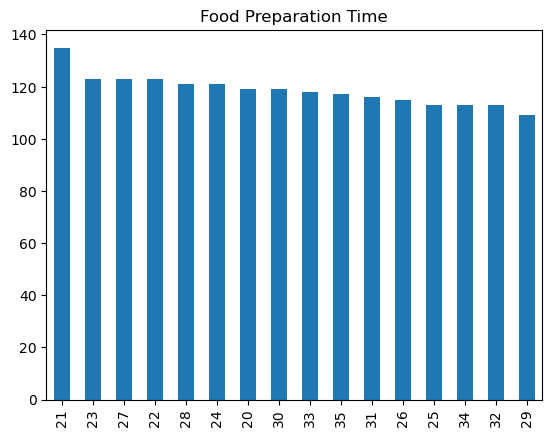

In [188]:
df.food_preparation_time.value_counts().plot(kind = 'bar', title = "Food Preparation Time")

<Axes: title={'center': 'Delivery Time'}>

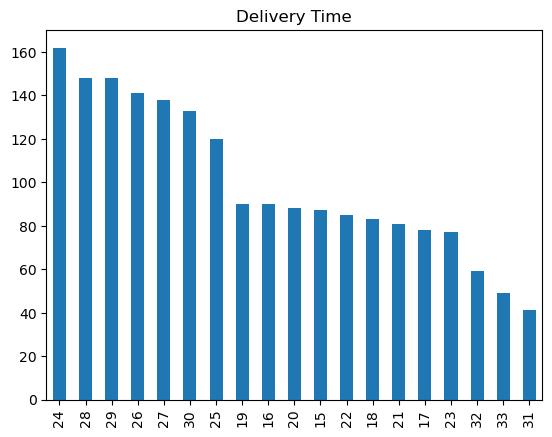

In [187]:
df.delivery_time.value_counts().plot(kind = 'bar',title = "Delivery Time")

<Axes: title={'center': 'Cost of Orders'}, ylabel='Frequency'>

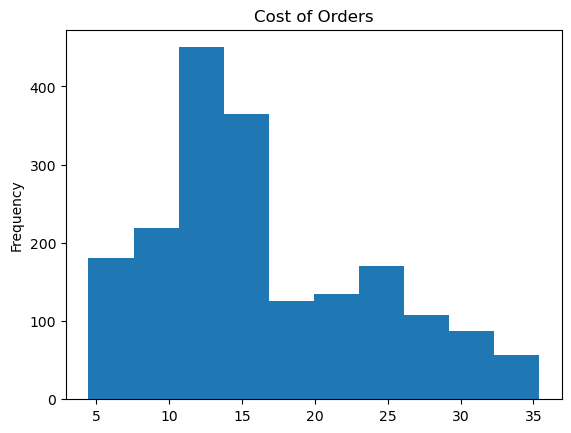

In [190]:
df.cost_of_the_order.plot(kind = 'hist', title = "Cost of Orders")

<Axes: title={'center': 'Ratings'}>

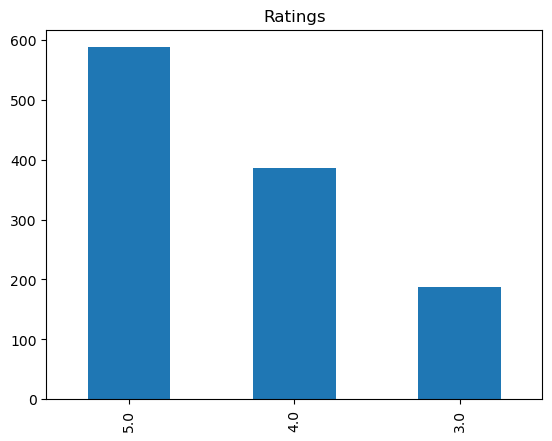

In [182]:
df.rating.value_counts().plot(kind = 'bar',title = "Ratings")